# Task 1  

## General instructions

First, update the following text to have a link to your Homework 2 GitHub repository:

**UPDATE THIS LINK**
https://github.com/olleholt/eds220-hw-3

Add comments for all your code and commit as needed. Err on the side of commenting and commiting too much for now. Points will be deducted for insufficient comments.


## About the data
In this task you will use two datsets:

**First dataset**

The first dataset contains information about [spilling incidents in the state of New York](https://data.ny.gov/Energy-Environment/Spill-Incidents/u44d-k5fk). 
The data portal has plenty of information. 
You will find extra information and metadata for this datset in the 'NYSDEC_SpillIncidents_Overview.pdf' and 'NYSDEC_SpillIncidents_DataDictionary.pdf' documents available at the portal.

You can access this datset via its URL or download it as a csv. 
If you chose to access it via URL, it will take a while to load every time you import it. 

**Second dataset**

The second dataset is a [TIGER shapefile from the United States Census Bureau](https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2022.html#list-tab-790442341). 
For this task you will need to **download the 2022 counties (and equivalent) TIGER shapefile**. 
You can check the [metadata for all the TIGER shapefiles here](https://www.census.gov/programs-surveys/geography/technical-documentation/complete-technical-documentation/tiger-geo-line.html). 



## File management
Make sure all your data files are inside a directory named 'data' inside your repository's directory (working directory).

## Datasets description
Read the metadata for both datsets and write a brief description about each once. Indicate the date sources and date of access.


#### description 1:
The first spill dataset contains records of spills of petroleum and other hazardous materials. The dataset contains information on the spill date, exact located, and possible contributing factors. I accessed the data on November 8th 2023 and is from the Department of Environmental Conservation.

#### description 2:
The second dataset contains TIGER shapefiles from US Census Bureau depicting state boundaries. This dataset was also accessed on Nov 8th 2023.

## FINAL CODE

You will use the next cell at the end of the task. Leave it blank for now. 

Index(['spill number', 'program facility name', 'street 1', 'street 2',
       'locality', 'county', 'zip code', 'swis code', 'dec region',
       'spill date', 'received date', 'contributing factor', 'waterbody',
       'source', 'close date', 'material name', 'material family', 'quantity',
       'units', 'recovered'],
      dtype='object') 

Index(['spill_number', 'program_facility_name', 'street_1', 'street_2',
       'locality', 'county', 'zip_code', 'swis_code', 'dec_region',
       'spill_date', 'received_date', 'contributing_factor', 'waterbody',
       'source', 'close_date', 'material_name', 'material_family', 'quantity',
       'units', 'recovered'],
      dtype='object')
['Other' 'Petroleum' 'Hazardous Material' 'Oxygenates']
['Westchester' 'Queens' 'Bronx' 'Sullivan' 'Cortland' 'New York' 'Ulster'
 'Kings' 'Orange' 'Dutchess' 'Onondaga' 'Saratoga' 'Cayuga' 'Oswego'
 'Warren' 'Niagara' 'Rockland' 'Nassau' 'Jefferson' 'Schenectady' 'Albany'
 'Monroe' 'St Lawrence' 'Richmond'

Text(66.97222222222221, 0.5, 'Latitude')

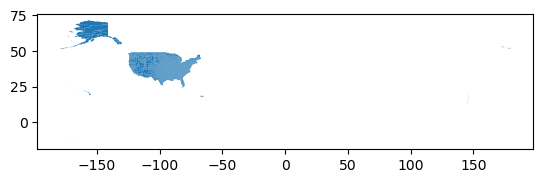

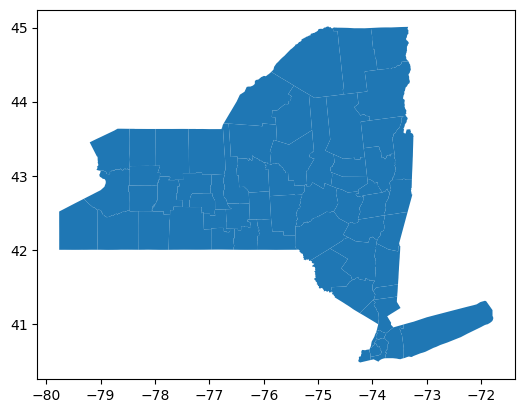

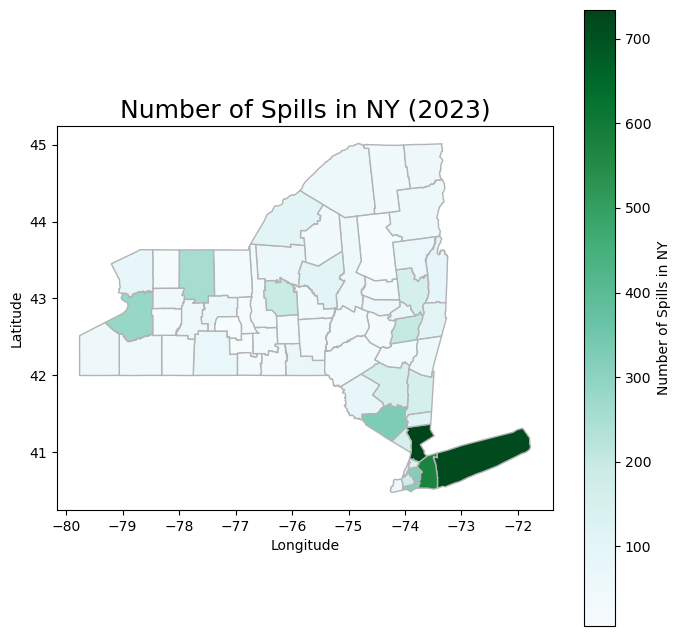

In [1]:
### ===== FINAL CODE =====
# import libraries here
# import numpy too
import os              
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

#importing the spill data csv
spills = pd.read_csv('data/Spill_Incidents_20231109.csv')

#importing the county shapefile
counties = gpd.read_file('data/tl_2022_us_county.shp')

# 1. viewing the first 5 rows of the spills dataframe
spills.head()

# 2.
# re-assign the column names - .str.lower() makes them lower case
spills.columns = spills.columns.str.lower()
print(spills.columns, '\n')

#  re-assign the column names again - .str.replace(' ','_') replaces the space for _
spills.columns = spills.columns.str.replace(' ','_')
print(spills.columns)

# 3. viewing the data types of each column
spills.dtypes

# 4. printing the unique values in the materials family column in the spills data frame
print(spills.material_family.unique())

# 5. printing the unique values in the county column in the spills data frame
print(spills.county.unique())

#converting the date column in spills df to a date time value from an object
spills['spill_date'] = pd.to_datetime(spills['spill_date'])

#subsetting from the spills dataframe for data with Petroleum between Jan 2023 and Oct 2023
petr_23 = spills[(spills.material_family == 'Petroleum') & (spills.spill_date >= '01/01/2023') & (spills.spill_date <= '10/31/2023')].copy()

#viewing the subset
petr_23

#veryfing that the material family column only has petroleum data with the unique function
petr_23.material_family.unique()

#using the unique function for the spill date column and specifying the year
petr_23.spill_date.dt.year.unique()

##using the unique function for the spill date column and specifying the month
petr_23.spill_date.dt.month.unique()

#creating a new df from the subset, grouping by county
spills_per_county = petr_23.groupby('county').count().spill_number.reset_index()

#renaming the spill number column as n_spills
spills_per_county = spills_per_county.rename(columns = {'spill_number':'n_spills'})

#viewing the new column name in the whole dataset
spills_per_county

# 1. viewing the first few rows in the counties data
counties.head()
# 2.
# re-assign the column names - .str.lower() makes them lower case
counties.columns = counties.columns.str.lower()
print(counties.columns, '\n')
# 3. 
#viewing the data types in the counties dataset for each column
counties.dtypes
# 4. 
#viewing the crs for the counties dataset
counties.crs
# 5. 
#plotting the counties data
counties.plot()

#after the state code was found to be 36, a new subset was created for NY counties based on that value
ny_counties = counties[counties.statefp == '36'].copy()

#plotting the new york counties subset
ny_counties.plot()

# 1. finding the unique values of the name column in the ny_counties subset
ny_counties.name.unique()
# 2. finding the unique values of the county column in the spills_per_county subset
spills_per_county.county.unique()
# 3. find the county names that are in spills_per_county but are not in ny_counties with setdiff1d()
np.setdiff1d(spills_per_county.county.unique(), ny_counties.name.unique())
# 4.Find the county names that are in ny_counties, but not in spills_per_county
np.setdiff1d(ny_counties.name.unique(), spills_per_county.county.unique())
# 5. Check the number of spills in 'Tuscarora Indian Reservation'
spills_per_county[spills_per_county.county == 'Tuscarora Indian Reservation']

# 1. Check the row in spills_per_county that has 'St Lawrence'
spills_per_county[spills_per_county.county == 'St Lawrence'].index
# 2. we can get the index of that single row like this, to access the actual row index
spills_per_county[spills_per_county.county=='St Lawrence'].index
# 3. we need to select the first item in that tuple using [0]
st_lawrence_index = spills_per_county[spills_per_county.county=='St Lawrence'].index[0]
st_lawrence_index
# 4. setting the value to something else using the at() function at the 50th index
#df.at[single_index_value, 'column_name']
spills_per_county.at[50,'county'] = "St. Lawrence"
# 5. checking that the update was successful with iloc
spills_per_county.iloc[50]

# 1. renaming the name column to match the other data set
ny_counties = ny_counties.rename(columns = {'name':'county'})
#viewing the column names
ny_counties.columns

# 2.
#merging the ny_counties and spills_per_county dataframes and overwriting the ny_counties df
ny_counties = pd.merge(ny_counties,
          spills_per_county,
          how = 'inner',
          on = 'county')

#viewing the column names
ny_counties.columns

#viewing the first few rows of the new data frame
ny_counties.head()

# 3. your code here
#findign the index of the Niagara county
ny_counties[ny_counties.county == 'Niagara'].index
#adding a spill to the Niagara county based on the index found above
ny_counties.at[31, 'n_spills'] += 1
#checking to make sure it updated
ny_counties.iloc[31]

#setting up a plot
fig, ax = plt.subplots(figsize = (8,8))
#adding the data to the plot for spills in NY counties
ny_counties.plot(ax=ax, column = 'n_spills', edgecolor='0.7', cmap = 'BuGn', legend = True, legend_kwds = {'shrink':1, 'label':"Number of Spills in NY"})
#changing the title and axis labels
ax.set_title('Number of Spills in NY (2023)', fontsize = 18)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

<!-- write your description in this markdwon cell -->

## Import libraries

In [2]:
# import libraries here
# import numpy too
import os              
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

## Import data 
In the next cell:

- Import the NY spills data as a variable named `spills`. 
- Import the US counties shapefile as a variable named `counties`.


In [3]:
# your code here

#importing the spill data csv
spills = pd.read_csv('data/Spill_Incidents_20231109.csv')

#importing the county shapefile
counties = gpd.read_file('data/tl_2022_us_county.shp')

<AxesSubplot:>

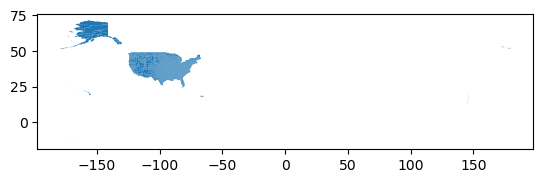

In [4]:
counties.plot()

## Prepare spills data

This section refers to the `spills` dataframe. 
Check the outputs carefully, they will give you context about the next exercises.

### Exploration

In the next cells:

1. Check the dataframe's head
2. Simplify column names as needed
3. Check the data types of the columns
4. Check the unique values in the `material_family` column
5. Check the unique values in the `county` column

You can add any other cells of preliminary data exploration.

In [5]:
spills

,Spill Number,Program Facility Name,Street 1,Street 2,Locality,County,ZIP Code,SWIS Code,DEC Region,Spill Date,Received Date,Contributing Factor,Waterbody,Source,Close Date,Material Name,Material Family,Quantity,Units,Recovered
0,107132,MH 864,RT 119/MILLWOOD RD,NaN,ELMSFORD,Westchester,NaN,6000,3,10/10/2001,10/10/2001,Unknown,NaN,Unknown,10/15/2001,unknown material,Other,10.0,Gallons,0.0
1,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0.0,Pounds,0.0
2,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0.0,NaN,0.0
3,204667,POLE 16091,GRACE AVE/BURKE AVE,NaN,BRONX,Bronx,NaN,301,2,08/02/2002,08/02/2002,Equipment Failure,NaN,Commercial/Industrial,10/28/2002,transformer oil,Petroleum,1.0,Gallons,0.0
4,210559,POLE ON,FERDALE LOMIS RD / RT 52,NaN,LIBERTY,Sullivan,NaN,5336,3,01/20/2003,01/20/2003,Traffic Accident,NaN,Commercial/Industrial,01/22/2003,transformer oil,Petroleum,6.0,Gallons,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542355,9904003,`-NYCT,5TH AND WEST 50 ST,NaN,MANHATTAN,New York,NaN,3101,2,07/06/1999,07/06/1999,Housekeeping,NaN,Commercial Vehicle,03/03/2009,diesel,Petroleum,20.0,Gallons,0.0
542356,304463,`-NYCT,35TH ST AND 11TH AVE,NaN,MANHATTAN,New York,NaN,3101,2,07/28/2003,07/28/2003,Unknown,NaN,Unknown,01/08/2014,unknown petroleum,Petroleum,0.0,Gallons,0.0
542357,9213322,`-NYCT / 146 ST,721 LENOX AVE,NaN,MANHATTAN,New York,NaN,3101,2,03/02/1993,03/02/1993,Tank Overfill,NaN,Commercial/Industrial,02/10/2003,#2 fuel oil,Petroleum,200.0,Gallons,0.0
542358,8909580,`-NYCT BUS DEPOT - S I,CASTLETON AVE @ RECTOR ST,NaN,STATEN ISLAND,Richmond,NaN,4301,2,01/05/1990,01/05/1990,Abandoned Drums,NaN,Commercial/Industrial,01/05/1990,unknown petroleum,Petroleum,0.0,NaN,0.0


In [6]:
# 1. viewing the first 5 rows of the spills dataframe
spills.head()

,Spill Number,Program Facility Name,Street 1,Street 2,Locality,County,ZIP Code,SWIS Code,DEC Region,Spill Date,Received Date,Contributing Factor,Waterbody,Source,Close Date,Material Name,Material Family,Quantity,Units,Recovered
0,107132,MH 864,RT 119/MILLWOOD RD,NaN,ELMSFORD,Westchester,NaN,6000,3,10/10/2001,10/10/2001,Unknown,NaN,Unknown,10/15/2001,unknown material,Other,10.0,Gallons,0.0
1,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0.0,Pounds,0.0
2,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0.0,NaN,0.0
3,204667,POLE 16091,GRACE AVE/BURKE AVE,NaN,BRONX,Bronx,NaN,301,2,08/02/2002,08/02/2002,Equipment Failure,NaN,Commercial/Industrial,10/28/2002,transformer oil,Petroleum,1.0,Gallons,0.0
4,210559,POLE ON,FERDALE LOMIS RD / RT 52,NaN,LIBERTY,Sullivan,NaN,5336,3,01/20/2003,01/20/2003,Traffic Accident,NaN,Commercial/Industrial,01/22/2003,transformer oil,Petroleum,6.0,Gallons,6.0


In [7]:
# 2.
# re-assign the column names - .str.lower() makes them lower case
spills.columns = spills.columns.str.lower()
print(spills.columns, '\n')

#  re-assign the column names again - .str.replace(' ','_') replaces the space for _
spills.columns = spills.columns.str.replace(' ','_')
print(spills.columns)


Index(['spill number', 'program facility name', 'street 1', 'street 2',
       'locality', 'county', 'zip code', 'swis code', 'dec region',
       'spill date', 'received date', 'contributing factor', 'waterbody',
       'source', 'close date', 'material name', 'material family', 'quantity',
       'units', 'recovered'],
      dtype='object') 

Index(['spill_number', 'program_facility_name', 'street_1', 'street_2',
       'locality', 'county', 'zip_code', 'swis_code', 'dec_region',
       'spill_date', 'received_date', 'contributing_factor', 'waterbody',
       'source', 'close_date', 'material_name', 'material_family', 'quantity',
       'units', 'recovered'],
      dtype='object')


In [8]:
# 3. viewing the data types of each column
spills.dtypes

spill_number               int64
program_facility_name     object
street_1                  object
street_2                  object
locality                  object
county                    object
zip_code                  object
swis_code                  int64
dec_region                 int64
spill_date                object
received_date             object
contributing_factor       object
waterbody                 object
source                    object
close_date                object
material_name             object
material_family           object
quantity                 float64
units                     object
recovered                float64
dtype: object

In [9]:
# 4. printing the unique values in the materials family column in the spills data frame
print(spills.material_family.unique())

['Other' 'Petroleum' 'Hazardous Material' 'Oxygenates']


In [10]:
# 5. printing the unique values in the county column in the spills data frame
print(spills.county.unique())

['Westchester' 'Queens' 'Bronx' 'Sullivan' 'Cortland' 'New York' 'Ulster'
 'Kings' 'Orange' 'Dutchess' 'Onondaga' 'Saratoga' 'Cayuga' 'Oswego'
 'Warren' 'Niagara' 'Rockland' 'Nassau' 'Jefferson' 'Schenectady' 'Albany'
 'Monroe' 'St Lawrence' 'Richmond' 'Clinton' 'Lewis' 'Essex' 'Chenango'
 'Erie' 'Livingston' 'Wayne' 'Suffolk' 'Orleans' 'Ontario' 'Genesee'
 'Otsego' 'Tompkins' 'Madison' 'Chemung' 'Seneca' 'Oneida' 'Broome'
 'Hamilton' 'Washington' 'Schuyler' 'Franklin' 'Columbia' 'Fulton'
 'Herkimer' 'Schoharie' 'Rensselaer' 'Montgomery' 'Putnam' 'Delaware'
 'New Jersey - Region 2' 'Steuben' 'Tioga' 'Chautauqua' 'Cattaraugus'
 'Wyoming' 'Yates' 'Greene' 'Pennsylvania - Region 9' 'Allegany'
 'New Jersey - Region 3 (N)' 'Cattaraugus Indian Reservation'
 'New Jersey - Region 3 (T)' 'Canada - Region 6' 'Canada - Region 9'
 'Pennsylvania - Region 8' 'Vermont - Region 5 (R)' 'Vermont - Region 4'
 'Connecticut - Region 3 (N)' 'Pennsylvania - Region 3'
 'Tuscarora Indian Reservation' 'Connecti

### Data selection

1. Select data about petroleum spills that took place between January 1st 2023, and October 31st (including both dates), 2023. Store it in a variable named `petr_23`. The data selection should occur in a single line. You may add cells if you needed.

In [11]:
# your code here
#converting the date column in spills df to a date time value from an object
spills['spill_date'] = pd.to_datetime(spills['spill_date'])

#subsetting from the spills dataframe for data with Petroleum between Jan 2023 and Oct 2023
petr_23 = spills[(spills.material_family == 'Petroleum') & (spills.spill_date >= '01/01/2023') & (spills.spill_date <= '10/31/2023')].copy()

#viewing the subset
petr_23

,spill_number,program_facility_name,street_1,street_2,locality,county,zip_code,swis_code,dec_region,spill_date,received_date,contributing_factor,waterbody,source,close_date,material_name,material_family,quantity,units,recovered
220,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,06/06/2023,Tank Test Failure,NaN,Unknown,07/12/2023,#2 fuel oil,Petroleum,0.0,Gallons,0.0
221,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,06/06/2023,Tank Test Failure,NaN,Unknown,07/12/2023,"used oil (heating, on-site consumption)",Petroleum,0.0,NaN,0.0
222,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,06/06/2023,Tank Test Failure,NaN,Unknown,07/12/2023,#2 fuel oil (on-site consumption),Petroleum,0.0,NaN,0.0
223,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,06/06/2023,Tank Test Failure,NaN,Unknown,07/12/2023,Diesel (E-Gen),Petroleum,0.0,NaN,0.0
225,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,06/06/2023,Tank Test Failure,NaN,Unknown,07/12/2023,waste oil/used oil,Petroleum,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541857,2208600,ZHANG RESIDENCE,11 ACORN LANE,NaN,STONY BROOK,Suffolk,NaN,5222,1,2023-01-22,01/22/2023,Equipment Failure,NaN,Private Dwelling,01/31/2023,#2 fuel oil,Petroleum,5.0,Gallons,0.0
541860,2303072,ZHANG RESIDENCE,93 CHERRY LANE,NaN,HICKSVILLE,Nassau,NaN,3024,1,2023-07-14,07/14/2023,Equipment Failure,NaN,Private Dwelling,09/18/2023,#2 fuel oil,Petroleum,0.0,NaN,0.0
541970,2208304,ZIMMERMAN - UST,19 MOUNTAIN AVENUE,NaN,LARCHMONT,Westchester,NaN,6032,3,2023-01-10,01/10/2023,Equipment Failure,NaN,Private Dwelling,NaN,#2 fuel oil,Petroleum,0.0,NaN,0.0
542253,2301301,ZULTOWSKY - UST,514 PELHAM MANOR RD,NaN,PELHAM,Westchester,NaN,6044,3,2023-05-16,05/16/2023,Equipment Failure,NaN,Private Dwelling,07/11/2023,#2 fuel oil,Petroleum,0.0,NaN,0.0


2. Verify that `petr_23` only has data for petroleum spills 

In [12]:
# your code here

#veryfing that the material family column only has petroleum data with the unique function
petr_23.material_family.unique()

array(['Petroleum'], dtype=object)

3. Verify that `petr_23` only has data for 2023. 
HINT: if you converted the `spill_date` column to datetime, you can use `petr_23.spill_date.dt.year.unique()`

In [13]:
# your code here
#using the unique function for the spill date column and specifying the year
petr_23.spill_date.dt.year.unique()

array([2023])

4. Verify that `petr_23` only has data from January to October. 

In [14]:
# your code here

##using the unique function for the spill date column and specifying the month
petr_23.spill_date.dt.month.unique()

array([ 6,  8,  9,  7,  1,  2,  3, 10,  5,  4])

### Data aggregation

Create new dataframe named `spills_per_county` with the number of petroleum spills per county from January to October 2023 (i.e. use the `petr_23` dataframe).

The resulting `spills_per_county` dataframe must be as follows:

- Index: integer numbers starting from 0
- Column one: county names, column name = `county`
- Column two: number of petroleum spills per county in 2023, column name = `n_spills`

You may add cells if you needed.

In [15]:
# your code here

#creating a new df from the subset, grouping by county
spills_per_county = petr_23.groupby('county').count().spill_number.reset_index()

#renaming the column name to n_spills from spill_number with rename()
spills_per_county = spills_per_county.rename(columns = {'spill_number':'n_spills'})

#viewing that change/the whole dataset
spills_per_county

,county,n_spills
0,Albany,204
1,Allegany,30
2,Bronx,143
3,Broome,74
4,Cattaraugus,46
...,...,...
59,Washington,96
60,Wayne,38
61,Westchester,734
62,Wyoming,24


## Prepare counties data

This section refers to the `counties` geodataframe. 
Check the outputs carefully, they will give you context about the next exercises.

### Exploration

In the next cells:

1. Check the geo-dataframe's head
2. Simplify column names as needed
3. Check the data types of the columns
4. Check the geo-dataframe's CRS
5. Plot the geo-dataframe.

You can add any other cells of preliminary data exploration.

In [16]:
# 1. viewing the first few rows in the counties data
counties.head()


,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477644346,10691216,+41.9158651,-096.7885168,"POLYGON ((-96.55515 41.91587, -96.55515 41.914..."
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680980770,61564427,+46.2946377,-123.4244583,"POLYGON ((-123.72755 46.26449, -123.72755 46.2..."
2,35,011,00933054,35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016818946,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.89337 34.08894, -104.89337 34.0..."
3,31,109,00835876,31109,Lancaster,Lancaster County,06,H1,G4020,None,None,None,A,2169272978,22847034,+40.7835474,-096.6886584,"POLYGON ((-96.68493 40.52330, -96.69219 40.523..."
4,31,129,00835886,31129,Nuckolls,Nuckolls County,06,H1,G4020,None,None,None,A,1489645185,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27370 40.11840, -98.27374 40.122..."


In [17]:
# 2.
# re-assign the column names - .str.lower() makes them lower case
counties.columns = counties.columns.str.lower()
print(counties.columns, '\n')

Index(['statefp', 'countyfp', 'countyns', 'geoid', 'name', 'namelsad', 'lsad',
       'classfp', 'mtfcc', 'csafp', 'cbsafp', 'metdivfp', 'funcstat', 'aland',
       'awater', 'intptlat', 'intptlon', 'geometry'],
      dtype='object') 



In [18]:
# 3. 
#viewing the data types in the counties dataset for each column
counties.dtypes

statefp       object
countyfp      object
countyns      object
geoid         object
name          object
namelsad      object
lsad          object
classfp       object
mtfcc         object
csafp         object
cbsafp        object
metdivfp      object
funcstat      object
aland          int64
awater         int64
intptlat      object
intptlon      object
geometry    geometry
dtype: object

In [19]:
# 4. 
#viewing the crs for the counties dataset
counties.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<AxesSubplot:>

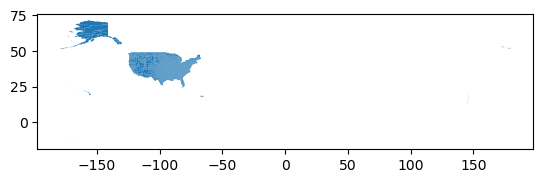

In [20]:
# 5. 
#plotting the counties data
counties.plot()

### Data selection

Select all the counties for the state of New York in a new variable `ny_counties` and plot them. HINT: to find which counties correspond to NY, look at the metadata.

<AxesSubplot:>

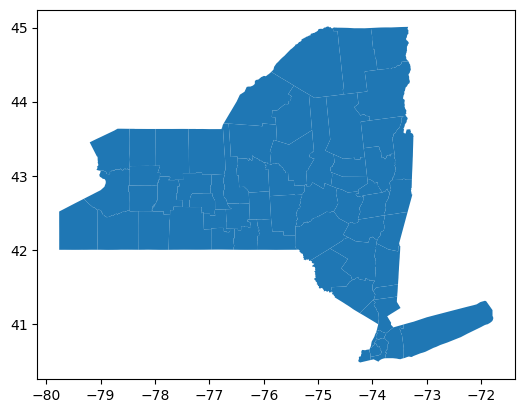

In [21]:
# your code here

#after the state code was found to be 36, a new subset was created for NY counties based on that value
ny_counties = counties[counties.statefp == '36'].copy()

#plotting the new york counties subset
ny_counties.plot()

## Merging

The goal of this section is to create a single dataframe with the number of spills per county and the corresponding geometries for each county.

### Explore data

In the next cells:

1. Print the names of counties in `ny_counties`, without repetition.
2. Print the names of counties in `spills_per_county`, without repetition. (Do you notice anything?)
3. Use the [`numpy` function `setdiff1d()`](https://numpy.org/doc/stable/reference/generated/numpy.setdiff1d.html) to find the county names that are in `spills_per_county`, but not in `ny_counties`. HINT: pay attention to the example in the documentation.
4. Find the county names that are in `ny_counties`, but not in `spills_per_county`.
5. Check the number of spills in 'Tuscarora Indian Reservation'.


In [22]:
# 1. finding the unique values of the name column in the ny_counties subset
ny_counties.name.unique()

array(['Steuben', 'Saratoga', 'Allegany', 'Oswego', 'Ulster',
       'St. Lawrence', 'Schuyler', 'Essex', 'Suffolk', 'Hamilton',
       'Dutchess', 'Otsego', 'Tompkins', 'Albany', 'Cayuga', 'Greene',
       'Herkimer', 'Warren', 'Jefferson', 'Clinton', 'Nassau', 'Madison',
       'Washington', 'Westchester', 'Lewis', 'Ontario', 'Cortland',
       'Richmond', 'Erie', 'Putnam', 'Montgomery', 'Sullivan', 'Orleans',
       'Oneida', 'Cattaraugus', 'Yates', 'Tioga', 'Monroe', 'Schoharie',
       'Broome', 'Rensselaer', 'Seneca', 'Queens', 'Genesee', 'Wayne',
       'Niagara', 'Kings', 'Chemung', 'Wyoming', 'New York', 'Columbia',
       'Chautauqua', 'Franklin', 'Onondaga', 'Chenango', 'Fulton',
       'Rockland', 'Livingston', 'Delaware', 'Orange', 'Schenectady',
       'Bronx'], dtype=object)

In [23]:
# 2. finding the unique values of the county column in the spills_per_county subset
spills_per_county.county.unique()

array(['Albany', 'Allegany', 'Bronx', 'Broome', 'Cattaraugus', 'Cayuga',
       'Chautauqua', 'Chemung', 'Chenango', 'Clinton', 'Columbia',
       'Cortland', 'Delaware', 'Dutchess', 'Erie', 'Essex', 'Franklin',
       'Fulton', 'Genesee', 'Greene', 'Hamilton', 'Herkimer', 'Jefferson',
       'Kings', 'Lewis', 'Livingston', 'Madison', 'Monroe', 'Montgomery',
       'Nassau', 'New Jersey - Region 2', 'New York', 'Niagara', 'Oneida',
       'Onondaga', 'Ontario', 'Orange', 'Orleans', 'Oswego', 'Otsego',
       'Putnam', 'Queens', 'Rensselaer', 'Richmond', 'Rockland',
       'Saratoga', 'Schenectady', 'Schoharie', 'Schuyler', 'Seneca',
       'St Lawrence', 'Steuben', 'Suffolk', 'Sullivan', 'Tioga',
       'Tompkins', 'Tuscarora Indian Reservation', 'Ulster', 'Warren',
       'Washington', 'Wayne', 'Westchester', 'Wyoming', 'Yates'],
      dtype=object)

In [24]:
# 3. find the county names that are in spills_per_county but are not in ny_counties with setdiff1d()
np.setdiff1d(spills_per_county.county.unique(), ny_counties.name.unique())

array(['New Jersey - Region 2', 'St Lawrence',
       'Tuscarora Indian Reservation'], dtype=object)

In [25]:
# 4.Find the county names that are in ny_counties, but not in spills_per_county
np.setdiff1d(ny_counties.name.unique(), spills_per_county.county.unique())

array(['St. Lawrence'], dtype=object)

In [26]:
# 5. Check the number of spills in 'Tuscarora Indian Reservation'
spills_per_county[spills_per_county.county == 'Tuscarora Indian Reservation']

,county,n_spills
56,Tuscarora Indian Reservation,1


### Data updates

In this section we will update 'St Lawrence' to 'St. Lawrence' in `spills_per_county` data frame.

In the next cells:
1. Check the row in `spills_per_county` that has 'St Lawrence'
2. Run the code and read the explanation in the comments
3. Run the code and read the explanation in the comments
4. Use the `st_lawrence_index` and `at` to update St Lawrence name in `spills_per_county` dataframe
5. Check the update was successfull

In [27]:
# 1. Check the row in spills_per_county that has 'St Lawrence'
spills_per_county[spills_per_county.county == 'St Lawrence'].index

Int64Index([50], dtype='int64')

In [28]:
# 2. we can get the index of that single row like this, to access the actual row index
spills_per_county[spills_per_county.county=='St Lawrence'].index

Int64Index([50], dtype='int64')

In [29]:
# 3. we need to select the first item in that tuple using [0]
st_lawrence_index = spills_per_county[spills_per_county.county=='St Lawrence'].index[0]
st_lawrence_index

50

In [30]:
# 4. setting the value to something else using the at() function at the 50th index
#df.at[single_index_value, 'column_name']
spills_per_county.at[50,'county'] = "St. Lawrence"

In [31]:
# 5. checking that the update was successful with iloc
spills_per_county.iloc[50]

county      St. Lawrence
n_spills              65
Name: 50, dtype: object

### Merge

In the following cells:
1. Use this cell to make any other updates needed for making an inner join of the `spills_per_county` and `ny_counties`. 
2. Over-write `ny_counties` as the  inner join of the `spills_per_county` and `ny_counties` dataframes.

From our previous exploration we know that Tuscarora Indian Reservation will not be in the join. Tuscarora Indian Reservation is located within Niagara county. 

3. Since the Tuscarora Indian Reservation does not appear in the `ny_counties` dataframe, add one spill to Niagara county. We will add a note about this in our final map. Add the cells you need to make this update **and** verify that the dataframe was updated.

In [32]:
# 1. renaming the name column to match the other data set
ny_counties = ny_counties.rename(columns = {'name':'county'})
#viewing the column names
ny_counties.columns

Index(['statefp', 'countyfp', 'countyns', 'geoid', 'county', 'namelsad',
       'lsad', 'classfp', 'mtfcc', 'csafp', 'cbsafp', 'metdivfp', 'funcstat',
       'aland', 'awater', 'intptlat', 'intptlon', 'geometry'],
      dtype='object')

In [33]:
# 2.
#merging the ny_counties and spills_per_county dataframes and overwriting the ny_counties df
ny_counties = pd.merge(ny_counties,
          spills_per_county,
          how = 'inner',
          on = 'county')

#viewing the column names
ny_counties.columns

#viewing the first few rows of the new data frame
ny_counties.head()

,statefp,countyfp,countyns,geoid,county,namelsad,lsad,classfp,mtfcc,csafp,cbsafp,metdivfp,funcstat,aland,awater,intptlat,intptlon,geometry,n_spills
0,36,101,00974148,36101,Steuben,Steuben County,06,H1,G4020,None,None,None,A,3601398422,35039875,+42.2667252,-077.3855253,"POLYGON ((-77.08327 42.00002, -77.09391 41.999...",72
1,36,091,00974143,36091,Saratoga,Saratoga County,06,H1,G4020,None,None,None,A,2097812305,87488004,+43.1061353,-073.8553872,"POLYGON ((-73.67891 42.91221, -73.67938 42.911...",159
2,36,003,00974100,36003,Allegany,Allegany County,06,H1,G4020,None,None,None,A,2666225086,12989848,+42.2478532,-078.0261531,"POLYGON ((-78.04342 42.51846, -78.04326 42.518...",30
3,36,075,00974136,36075,Oswego,Oswego County,06,H1,G4020,None,None,None,A,2464636023,933469962,+43.4614431,-076.2092618,"POLYGON ((-76.02509 43.70702, -76.02004 43.706...",68
4,36,111,00974153,36111,Ulster,Ulster County,06,H1,G4020,None,None,None,A,2911757764,94596810,+41.9472124,-074.2654582,"POLYGON ((-74.07480 42.09659, -74.06441 42.120...",159


In [34]:
# 3. your code here
#findign the index of the Niagara county
ny_counties[ny_counties.county == 'Niagara'].index
#adding a spill to the Niagara county based on the index found above
ny_counties.at[31, 'n_spills'] += 1
#checking to make sure it updated
ny_counties.iloc[31]

statefp                                                    36
countyfp                                                  105
countyns                                             00974150
geoid                                                   36105
county                                               Sullivan
namelsad                                      Sullivan County
lsad                                                       06
classfp                                                    H1
mtfcc                                                   G4020
csafp                                                    None
cbsafp                                                   None
metdivfp                                                 None
funcstat                                                    A
aland                                              2507484145
awater                                               73737482
intptlat                                          +41.7199928
intptlon

## Map
Create a choropleth map of the number of petroleum spills per county in the state of New York in 2023. 
Your map should have (at least) the following updates:
- a legend indicating the number of spills
- an updated color map
- a title 
- no axis
- an annotation with the data source (New York State Department of Environmental Conservation), date of access HINT: check the graph we did for power plants, 
- an annotation indicating one spill occurred in Tuscarora Indian Reservation within Niagara county

Tuscarora Indian Reservation in Niagara county

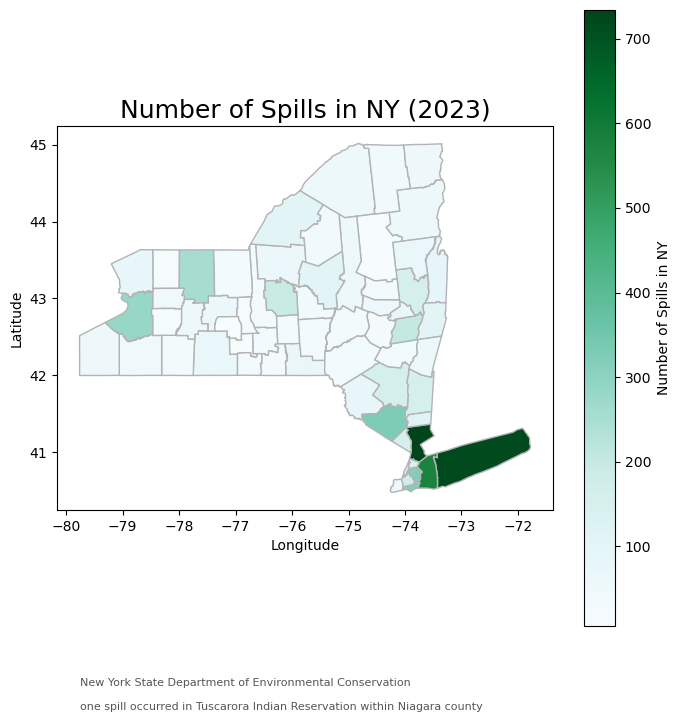

In [51]:
# your code here
#setting up a plot
fig, ax = plt.subplots(figsize = (8,8))
#adding the data to the plot for spills in NY counties
ny_counties.plot(ax=ax, column = 'n_spills', edgecolor='0.7', cmap = 'BuGn', legend = True, legend_kwds = {'shrink':1, 'label':"Number of Spills in NY"})
#changing the title and axis labels
ax.set_title('Number of Spills in NY (2023)', fontsize = 18)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

ax.annotate('New York State Department of Environmental Conservation', xy = (0.1,0.04),xycoords = 'figure fraction',fontsize = 8, color = '#555555')
ax.annotate('one spill occurred in Tuscarora Indian Reservation within Niagara county', xy = (0.1,0.01),xycoords = 'figure fraction',fontsize = 8, color = '#555555')

plt.show()

## Final code

Collect all the relevant code into the first blank cell of the notebook titled "FINAL CODE". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. For each line, add a single comment explaining what the code does.